In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns

In [3]:
api = wandb.Api()

# Replace 'your_project_name' and 'your_run_id' with your wandb project name and run ID
run = api.run("jan_korytar_team/Unet-segmentation-pytorch/8y7qgepa")

# Download the run history as a DataFrame
history = run.history()
print(history['val_loss'])

0     0.313382
1     0.174716
2     0.222203
3     0.169826
4     0.195116
5     0.152642
6     0.141950
7     0.148171
8     0.168909
9     0.139815
10    0.132212
11    0.125549
12    0.125297
13    0.136256
14    0.135756
15    0.183977
16    0.125297
Name: val_loss, dtype: float64


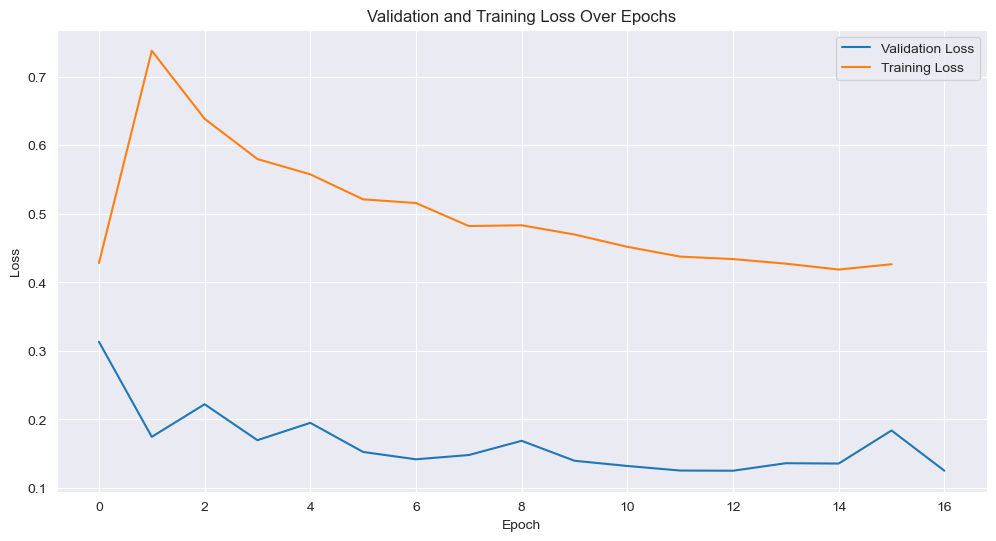

In [9]:
# Assuming your validation loss is logged as 'val_loss'
if 'val_loss' in history.columns:
    val_loss = history['val_loss'].dropna().reset_index(drop=True)
    train_loss = history['train_loss'].dropna().reset_index(drop=True)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=val_loss.index, y=val_loss, label='Validation Loss')
    sns.lineplot(x=train_loss.index, y=train_loss, label='Training Loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(val_loss) + 1, 2))
    plt.title('Validation and Training Loss Over Epochs')
    plt.legend()    
    plt.savefig('loss_localization', bbox_inches='tight')
    plt.show()
else:
    print("Validation loss ('val_loss') not found in the run logs.")